In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [71]:
df = pd.read_csv('raw_data.csv', index_col=0)

df.head()

,Title,Shop_Name,Is_Ad,Star_Rating,Num_Reviews,Price,Is_Bestseller,Num_Sales,Num_Basket,Description,Days_to_Arrival,Cost_Delivery,Returns_Accepted,Dispatched_From,Num_Images,Category
0,"Happy birthday card, Bird birthday card, Natur...",279,1,5,"2,391",4.99,1.0,"14,319",20,Each piece at Chau Art is originally hand desi...,3.0,0.99,1,United Kingdom,1,birthday card
1,"Carousel Happy Birthday Card, Handmade Laser C...",1689,1,5,"1,728",5.99,1.0,"15,066",0,POSTAGE: UK - From 5 Sept 2020 all orders will...,6.0,2.95,1,United Kingdom,1,birthday card
2,FLOWER BIRTHDAY CARD | Birthday Card for Her |...,348,1,5,97,2.30,1.0,"1,041",20,Flower birthday card featuring a pink orchid o...,6.0,1.00,0,United Kingdom,3,birthday card
3,"Personalized Leather Card Holder, Black red bl...",991,1,4.5,"1,345",25.19,1.0,"11,375",20,▲ Croc embossed Genuine Leather Personalised C...,4.0,3.99,0,United Kingdom,10,birthday card
4,"Among Us Birthday Card - It's Your Birthday, S...",1982,1,5,24,2.95,1.0,843,20,"Among Us Birthday Card - Its Your Birthday, Se...",4.0,1.00,1,United Kingdom,8,birthday card


## Data Exploration Roadmap

* drop category column 


* Describe data - will get numeric values 
* df.shape 
* value_counts 
* check out NaNs
* group by shop names to see unique shops 
    * Price, days to arrival, cost delivery, num images for top-num sales shops 


* bar graph for is_ad
* bar graph for star_rating -> bucket star count 
* bar graph for is_bestseller
* bar graph for numbasket
* bar graph for returns accepted 


* Histogram of num reviews
* Histogram of price 
* Histogram of num sales 
* Histogram days to arrival 
* Histogram of delivery cost 
* Histogram for num images 


* value_counts for delivery country 

* description/ title feature engineering? 

### Price- Specific Exploration

* Price for ad vs. not ad 
* Price for star rating 
* Price for num reviews
* Price for image count 
* Price for bestseller 
* Price for num sales 
* Price for delivery cost 
* Correlation heatmap 

In [53]:
df = df.drop(['Category'], axis=1)

In [54]:
df.shape

(14731, 15)

In [55]:
df.dtypes

Title                object
Shop_Name             int64
Is_Ad                 int64
Star_Rating          object
Num_Reviews          object
Price               float64
Is_Bestseller       float64
Num_Sales            object
Num_Basket            int64
Description          object
Days_to_Arrival     float64
Cost_Delivery       float64
Returns_Accepted      int64
Dispatched_From      object
Num_Images            int64
dtype: object

In [73]:
df['Num_Sales'] = df['Num_Sales'].str.replace(',', '')
df['Num_Sales'] = df['Num_Sales'].astype(int)

0    14319
1    15066
2     1041
3    11375
4      843
Name: Num_Sales, dtype: int32

In [57]:
df.dtypes

Title                object
Shop_Name             int64
Is_Ad                 int64
Star_Rating         float64
Num_Reviews         float64
Price               float64
Is_Bestseller       float64
Num_Sales           float64
Num_Basket            int64
Description          object
Days_to_Arrival     float64
Cost_Delivery       float64
Returns_Accepted      int64
Dispatched_From      object
Num_Images            int64
dtype: object

In [74]:
df.describe()

,Shop_Name,Is_Ad,Price,Is_Bestseller,Num_Sales,Num_Basket,Days_to_Arrival,Cost_Delivery,Returns_Accepted,Num_Images
count,14731.000000,14731.000000,14188.000000,10091.0,14731.000000,14731.000000,12089.000000,14674.000000,14731.00000,14731.000000
mean,1015.232707,0.147784,3.877365,1.0,9662.620121,2.354355,4.198610,0.674687,0.70165,3.116693
std,618.989182,0.354897,3.207983,0.0,14059.238429,4.699816,22.512935,1.596402,0.45755,2.524616
min,0.000000,0.000000,0.500000,1.0,0.000000,0.000000,-346.000000,0.000000,0.00000,1.000000
25%,471.000000,0.000000,2.950000,1.0,1113.000000,0.000000,4.000000,0.000000,0.00000,1.000000
50%,1005.000000,0.000000,3.400000,1.0,4697.000000,0.000000,5.000000,0.000000,1.00000,2.000000
75%,1576.000000,0.000000,3.950000,1.0,12524.500000,3.000000,7.000000,1.000000,1.00000,4.000000
max,2117.000000,1.000000,133.000000,1.0,139336.000000,113.000000,19.000000,43.180000,1.00000,10.000000


In [8]:
df = df.drop(['Is_Bestseller'], axis=1)
df = df[df['Days_to_Arrival'] > 0]
df = df[df['Num_Basket'] <= 20]
df.shape

In [18]:
df.isnull().sum()

Title                 0
Shop_Name             0
Is_Ad                 0
Star_Rating         709
Num_Reviews         343
Price               420
Num_Sales             0
Num_Basket            0
Description           0
Days_to_Arrival       0
Cost_Delivery         0
Returns_Accepted      0
Dispatched_From       0
Num_Images            0
dtype: int64

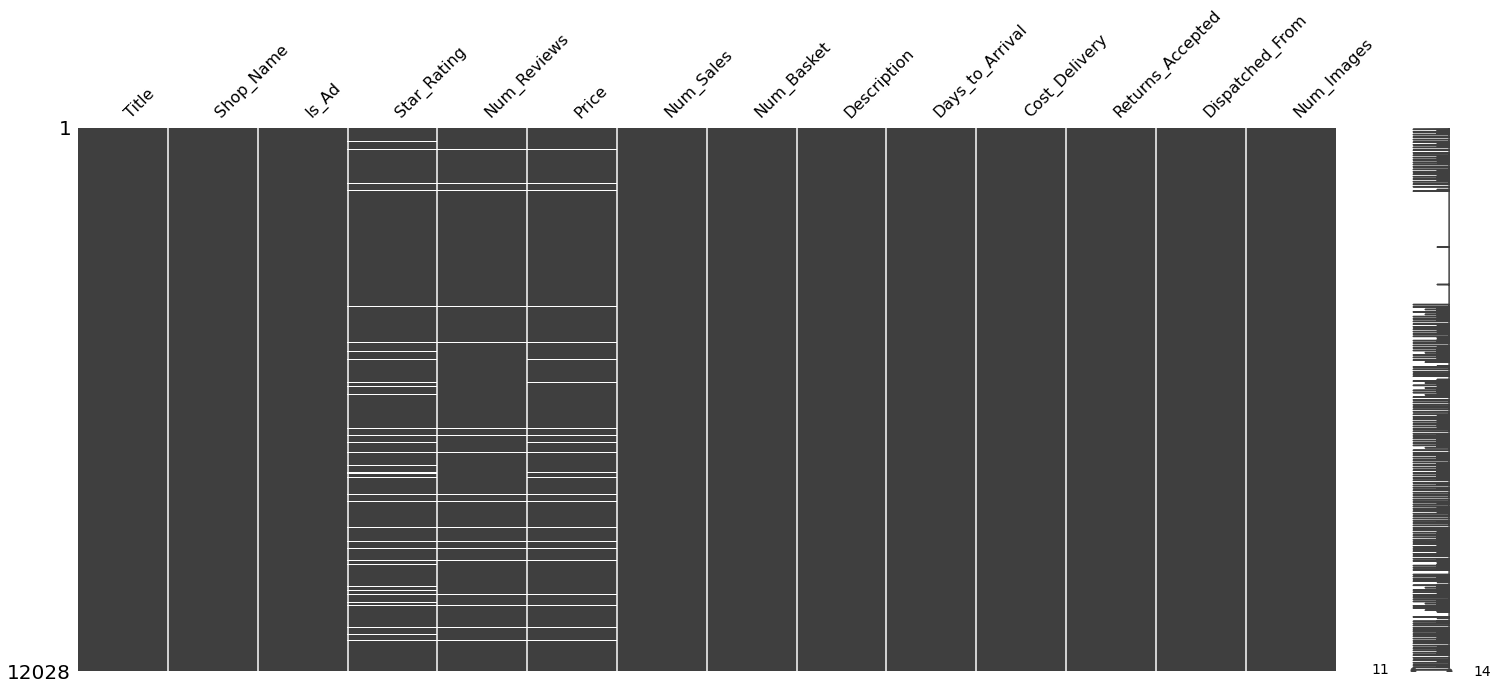

In [20]:
msno.matrix(df)
plt.show()

In [21]:
df.dropna(subset = ["Price"], inplace=True)
df.shape

(11608, 14)

In [22]:
df.isnull().sum()

Title                 0
Shop_Name             0
Is_Ad                 0
Star_Rating         289
Num_Reviews           0
Price                 0
Num_Sales             0
Num_Basket            0
Description           0
Days_to_Arrival       0
Cost_Delivery         0
Returns_Accepted      0
Dispatched_From       0
Num_Images            0
dtype: int64

In [24]:
df[df['Star_Rating'].isnull()].head(10)

,Title,Shop_Name,Is_Ad,Star_Rating,Num_Reviews,Price,Num_Sales,Num_Basket,Description,Days_to_Arrival,Cost_Delivery,Returns_Accepted,Dispatched_From,Num_Images
65,"Violin Houseplant Card - Eco Greetings Card, G...",1677,1,NaN,0,3.50,4,0,A5 card features my Violin design with a lovel...,6.0,0.00,1,United Kingdom,2
87,Electric Guitar Houseplant Card - Eco Greeting...,1677,1,NaN,0,3.50,4,0,A5 card features my John Mayer signature Silve...,6.0,0.00,1,United Kingdom,2
133,Wurlitzer Piano Houseplant Card - Eco Greeting...,1677,1,NaN,0,3.50,4,1,A5 card features my vintage Wurlitzer electric...,6.0,0.00,1,United Kingdom,2
151,You're on Mute Card,1869,1,NaN,0,2.99,20,8,"Funny, high quality Youre on Mute Card that yo...",4.0,1.00,0,United Kingdom,1
366,Courage Greeting Card,103,1,NaN,0,2.95,0,0,"Sometimes in life we need a little bravery, bu...",6.0,0.99,0,United Kingdom,2
391,Courage Greeting Card,103,1,NaN,0,2.95,0,0,"Sometimes in life we need a little bravery, bu...",6.0,0.99,0,United Kingdom,2
458,Cute Dog Card / Cute Animal Card / Birthday C...,1957,1,NaN,0,3.49,1,0,It wasnt me...honest! Our lovely cute King Ch...,6.0,0.00,0,United Kingdom,1
737,Personalised Giraffe Birthday Card! Cross-stit...,346,1,NaN,0,6.00,1,1,Gerald the Giraffe Cross-Stitch Personalised B...,4.0,0.00,0,United Kingdom,1
756,Happy Birthday - Abstract Leopard - Screen pri...,1743,1,NaN,0,3.00,8,1,"An original painterly screen print, hand print...",4.0,0.00,1,United Kingdom,6
802,Stars Greeting Card,103,1,NaN,0,2.95,0,0,Sometimes we struggle through periods in our l...,6.0,0.99,0,United Kingdom,2


-All ads
-Few sales
-Likely don't have any reviews
-Will create two datasets - one imputing the NaNs with 0, the other dropping the NaN records

* group by shop names to see unique shops 
    * Price, days to arrival, cost delivery, num images for top-num sales shops 

In [36]:
df.groupby('Shop_Name').agg({'Num_Sales':'mean','Price':'mean','Cost_Delivery':'mean','Num_Images': 'mean'}).sort_values('Num_Sales', ascending=False).reset_index()

DataError: No numeric types to aggregate

In [31]:
df.groupby('Num_Sales').sort_values(ascending=False)

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'